In [2]:
from numpy import *
import numpy as np

In [8]:
# Examples
a = array([1, 2, 4.4])
a**2
np.sin(a)

array([ 0.84147098,  0.90929743, -0.95160207])

In [9]:
# Il ne faut pas utiliser le module math avec des tableaux numpy
import math

math.sin(a)

TypeError: only length-1 arrays can be converted to Python scalars

In [14]:
# Comparaison de la vitesse entre une liste et un tableau 
a = random.rand(1000000)

%timeit a**2

def carre(x):
    return [elm**2 for elm in x]
b = list(a)

%timeit carre(b)

1000 loops, best of 3: 791 µs per loop
1 loop, best of 3: 204 ms per loop


# Avantages (et inconvénients) des tableaux


In [22]:
a = array([1, 2])
a[0] = 3.14
a
# Taille et typde du tableau est fixe

array([3, 2])

# Création d'un tableau
Il existe plusieurs fonctions pour créer un tableau.

* array :  partir d'une liste
* zeros, ones, eye
* arange
* linspace, logspace
* loadtxt
* load/save

Le type est déterminé automatiquement. On peut le forcer avec l'argument dtype

In [25]:
# Array ne fonctionne pas avec un générateur !
def mon_generateur():
    for _ in range(10):
        yield 1
    for _ in range(10):
        yield 2
array(list(mon_generateur()))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
print(arange(3, 8))
print(arange(3, 8, 2))
# arange(debut, fin, pas)
arange(3, 8, 2.2)

[3 4 5 6 7]
[3 5 7]


array([ 3. ,  5.2,  7.4])

In [30]:
# linspace(debut, fin, N)
linspace(0, 1, 10)
dt = 1E-3
N = 1000
T_tot = N*dt
Tt = linspace(0, T_tot, N)
print(Tt[1] - Tt[0])

0.001001001001


In [8]:
# Attention pour linspace
# Si on veut contrôler delta_x, c'est mieux ainsi
Tt = arange(N)*dt
len(Tt)

In [39]:
linspace(0, 1, 10, endpoint=False)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [40]:
logspace(1, 2, endpoint=False)

array([ 10.        ,  10.47128548,  10.96478196,  11.48153621,
        12.02264435,  12.58925412,  13.18256739,  13.80384265,
        14.45439771,  15.13561248,  15.84893192,  16.59586907,
        17.37800829,  18.19700859,  19.05460718,  19.95262315,
        20.89296131,  21.87761624,  22.90867653,  23.98832919,
        25.11886432,  26.30267992,  27.54228703,  28.84031503,
        30.1995172 ,  31.6227766 ,  33.11311215,  34.67368505,
        36.30780548,  38.01893963,  39.81071706,  41.68693835,
        43.65158322,  45.70881896,  47.86300923,  50.11872336,
        52.48074602,  54.95408739,  57.54399373,  60.25595861,
        63.09573445,  66.0693448 ,  69.18309709,  72.44359601,
        75.8577575 ,  79.43282347,  83.17637711,  87.096359  ,
        91.20108394,  95.4992586 ])

In [42]:
mon_tableau = loadtxt('/tmp/fichier_data.txt.csv')
savetxt('/tmp/autre_fichier.txt', mon_tableau)

In [46]:
a = random.rand(100000)

%timeit savetxt('/tmp/fichier_a.txt', a)
%timeit loadtxt('/tmp/fichier_a.txt')

%timeit save('/tmp/fichier_a.npy', a)
%timeit load('/tmp/fichier_a.npy')

1 loop, best of 3: 363 ms per loop
1 loop, best of 3: 552 ms per loop
100 loops, best of 3: 5.89 ms per loop
The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 316 µs per loop


In [50]:
zeros(10, dtype=int)
arange(10, dtype=float)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [66]:
print(array([2])**63)
-2**63

[-9223372036854775808]


/dd_int/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


-9223372036854775808

In [80]:
a = array([1], np.float128)
b = array([1E-16], np.float128)
print((a+b) - a)

a = array([1], np.float64)
b = array([1E-16], np.float64)
print((a+b) - a)

[ 9.996344e-17]
[ 0.]


# Fonctions vectorisées
C'est une fonction qui calcul sur un tableau élément par élément

In [83]:
x = linspace(-1, 1, 11, endpoint=False)*pi

In [89]:
# Souvent il n'y a rien a faire
sin(x)

def ma_fonction(x):
    return sin(x)**2 + cos(x)**2

print(ma_fonction(x))


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [90]:
# Sinon, on utiliser le décorateur vectorize
# Mais il existe des solutions pour éviter d'avoir à 
# l'utiliser (c.f. prochaine partie)
@vectorize
def mafonction(a):
    if a>0:
        return a
    else:
        return -a
    
mafonction(x)

array([ 3.14159265,  2.57039399,  1.99919533,  1.42799666,  0.856798  ,
        0.28559933,  0.28559933,  0.856798  ,  1.42799666,  1.99919533,
        2.57039399])

In [91]:
# Il faut connaitre l'origine de cette erreur
if x>0:
    pass

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [94]:
(x>0).any()

True

# Indexer un tableau

In [98]:
x = linspace(-1, 1, 51, endpoint=False)*pi
# x[start:stop:step], comme range ou arange
x[4:10:2]

array([-2.64879381, -2.40239438, -2.15599496])

In [99]:
slice(4,10,2)

slice(4, 10, 2)

In [100]:
# C'est un racourcis pour créer un slice
x[slice(4, 10, 2)]

array([-2.64879381, -2.40239438, -2.15599496])

In [102]:
# tout sauf le dernier
x[:-1]

array([-3.14159265, -3.01839294, -2.89519323, -2.77199352, -2.64879381,
       -2.52559409, -2.40239438, -2.27919467, -2.15599496, -2.03279525,
       -1.90959553, -1.78639582, -1.66319611, -1.5399964 , -1.41679669,
       -1.29359698, -1.17039726, -1.04719755, -0.92399784, -0.80079813,
       -0.67759842, -0.5543987 , -0.43119899, -0.30799928, -0.18479957,
       -0.06159986,  0.06159986,  0.18479957,  0.30799928,  0.43119899,
        0.5543987 ,  0.67759842,  0.80079813,  0.92399784,  1.04719755,
        1.17039726,  1.29359698,  1.41679669,  1.5399964 ,  1.66319611,
        1.78639582,  1.90959553,  2.03279525,  2.15599496,  2.27919467,
        2.40239438,  2.52559409,  2.64879381,  2.77199352,  2.89519323])

In [103]:
# Les deux derniers
x[-2:]

array([ 2.89519323,  3.01839294])

In [109]:
# La différence entre deux éléments consécutifs
y = sin(x)
z = y[1:] - y[:-1]

In [114]:
print(z.sum())
print(y[-1] - y[0])

z.mean()
z.std()
z.min()
z.max()

np.mean(y**2)
(y**2).mean()

0.122888290665
0.122888290665


0.5

In [115]:
# Indexer avec un tableau d'entier
y[array([1, 4, 6, 2])]

array([-0.12288829, -0.47309356, -0.67369564, -0.24391372])

In [120]:
# Par exemple : argsort
# Les trois éléments les plus petits
y = random.rand(10)
print(y)
k = y.argsort()
print(y[k[:3]])

[ 0.55222481  0.47171723  0.39277078  0.21590448  0.25450486  0.1817899
  0.7326054   0.6828779   0.46761122  0.55089921]
[ 0.1817899   0.21590448  0.25450486]


In [128]:
y = random.rand(10)
print(y)
k = y.argsort()

y[k[:3]] = y[k[-3:]]
print(y)


[ 0.57958054  0.36060437  0.02491517  0.64643728  0.21258396  0.98147722
  0.90411637  0.33835655  0.81355037  0.80026895]
[ 0.57958054  0.36060437  0.81355037  0.64643728  0.90411637  0.98147722
  0.90411637  0.98147722  0.81355037  0.80026895]


In [129]:
# Avec un tableau de booléens
a = array([1, 5, 6])
b = array([True, False, True])
a[b]

array([1, 6])

In [132]:
a = random.rand(10)-.5
a[a<0] = 0
a

array([ 0.16082526,  0.08950054,  0.        ,  0.19401739,  0.12452296,
        0.46319504,  0.46988457,  0.15950239,  0.        ,  0.47329232])

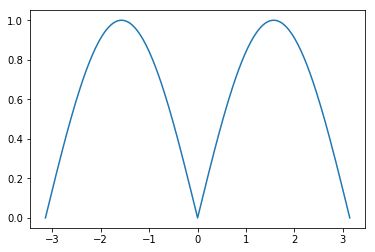

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt

x = linspace(-pi, pi, 201)
y = sin(x)
y[y<0] = -y[y<0]
plt.plot(x, y)

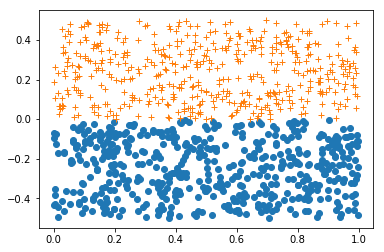

In [140]:
N = 1000
y = np.random.rand(N) - .5
x = np.random.rand(N)
mask = (y>0)
plt.plot(x[~mask], y[~mask], 'o')
plt.plot(x[mask], y[mask], '+')

In [144]:
a = array([True, False, True, False])
b = array([True, True, False, False])
print(a & b)
print(a | b)
print(a ^ b)
print(~a)

[ True False False False]
[ True  True  True False]
[False  True  True False]
[False  True False  True]


# Tableau dans la mémoire
* strides

In [147]:
a = arange(10)
b = a[1:4]

In [151]:
b[0] = 10
a

array([ 0, 10,  2,  3,  4,  5,  6,  7,  8,  9])

In [157]:
a = arange(10)-1
a.data.tobytes()

b'\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00'

In [160]:
b = a[::2]
b.data.tobytes()


b'\xff\xff\xff\xff\xff\xff\xff\xff\x01\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00'

In [166]:
b.strides

(16,)

In [167]:
a = zeros((4, 4))
a.strides

(32, 8)

In [168]:
a = arange(10)
a.strides = (4,)
print(a)

[          0  4294967296           1  8589934592           2 12884901888
           3 17179869184           4 21474836480]


# Modifier un tableau

In [ ]:
x = random.rand(10)


In [ ]:
x = random.rand(10)


In [ ]:
x = random.rand(10)
x[x>.5] = .5

In [13]:
# Valeur absolue?


# Tableaux nD

In [ ]:
a = array([[1,2], [3, 4]])
# l'index est un tuple

In [ ]:
x = random.rand(5, 5)
# Récupérer une colonne


In [ ]:
# méthode reshape
x = random.rand(25)

In [ ]:
x = random.rand(5, 3)
x.strides

In [ ]:
# Attention, numpy évite de recopier la memoire
x = arange(10)
b = x[1::2]
b[2] = 100
x

In [ ]:
x = arange(10)
b = x[x%2==0]
b[2] = 100
x

In [14]:
# meshgrid


In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


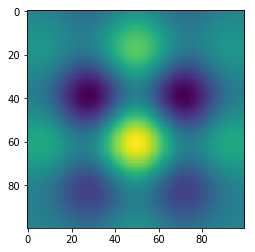

In [18]:
# Création d'une image 2D avec meshgrid

x = linspace(-.5, .5, 100)*4*pi
y = linspace(-.5, .5, 100)*4*pi
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
imshow((sin(Y)+cos(X))*exp(-R**2/30))

# Broadcast

In [26]:
# Si sur une dimension la taille du tableau vaut 1, alors numpy peut l'étendre
# pour qu'elle est la même valeur que celle de l'autre tableau
x = random.rand(5, 5)
a = array([arange(5)])
print(a.shape)
x[2:4, :] = a

(1, 5)


In [23]:
# Il y a une syntaxe simple pour rajouter une dimension de taille 1
# C'est newaxis
a = arange(5)
b = a[newaxis, :]
x = random.rand(5, 5)
x[2:4, :] = b
x

array([[  7.28573512e-02,   1.42947928e-01,   2.01724084e-01,
          8.26562378e-01,   1.35450868e-01],
       [  9.40177671e-01,   8.30012529e-01,   4.61468663e-01,
          5.12394353e-01,   2.81813372e-01],
       [  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   4.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   4.00000000e+00],
       [  6.94346501e-01,   8.56704397e-02,   6.53554267e-02,
          2.66422883e-03,   7.49485383e-01]])

In [27]:
# Exemple : calculer une moyenne pondérée 
# Chaque ligne est un élève, chaque colonne un examen
notes = random.rand(10, 5)*20
coef = array([1, 4, 2, 5, 8])

In [28]:
# Il est inutile de faire des boucles


# Au delà de numpy : numba
* Calculer $\pi$ (avec une formule très très lente!!!)
$$ \frac\pi4 = \sum_i \frac{(-1)^i}{2i+1} = 1 - \frac13 + \frac 15 - \frac17 + \ldots $$


In [29]:
def pi_python(N):
    res = 0
    coef = 1
    for i in range(N):
        res += coef/(2*i+1)
        coef = -coef
    return 4*res

%timeit pi_python(1000000) # 155 ms

def pi_np(N):
    Ti = arange(N)
    return 4*np.sum((1-2*(Ti%2))/(2*Ti+1))

%timeit pi_np(1000000) # 28.3ms

from numba import jit, int64, float64
numba_pi = jit(float64(int64))(pi_python)

@jit( float64(int64) )
def pi_python(N):
    res = 0
    coef = 1
    for i in range(N):
        res += coef/(2*i+1)
        coef = -coef
    return 4*res
%timeit numba_pi(1000000)

10 loops, best of 3: 160 ms per loop
10 loops, best of 3: 31.6 ms per loop
100 loops, best of 3: 8.87 ms per loop
